### Integration and the Stefan-Boltzmann Constant

(See Newman exercise 5.12, p. 181)

The Planck theory of thermal radiation tells us that in the (angular) frequency range $\omega$ to $\omega + d\omega$, a blackbody of unit area radiates electromagnetically an amount of thermal energy per second equal to $I(\omega)d\omega$, where
$$I(\omega) = \frac{\hbar}{4\pi^2c^2}\frac{\omega^3}{{\rm e}^{\hbar\omega/k_BT} - 1}\,.$$
Here $\hbar$ is Planck's constant over $2\pi$, $c$ is the speed of light, and $k_B$ is Botlzmann's constant.

From this, we can show that the total energy per unit area radiated by a blackbody is
$$W = \frac{k_B^4T^4}{4\pi^2c^2\hbar^3}\int_0^\infty \frac{x^3}{{\rm e}^{x} - 1}dx\,.$$

This is more commonly expressed as 
$$W = \sigma T^4\,,$$
where $\sigma$ is a constant, called the Stefan-Boltzmann constant.


Our goal is to calculate the dimensionless value of the integral that enters into the Stefan-Boltzmann constant:
$$I = \int_0^\infty \frac{x^3}{{\rm e}^x - 1}dx\,.$$

To remap the infinite range in this integral to a finite interval, we need to change to a variable $z(x)$ that goes from one finite value to another as $x$ goes from 0 to $\infty$. A standard choice is 
$$z = \frac{x}{1+x}\ \ \ \Leftrightarrow\ \ \ x = \frac{z}{1-z}\,.$$
Then $dx = dz/(1-z)^2$ and our integral becomes

$$I = \int_0^1 \frac{1}{(1-z)^2}\frac{(z)^3}{(1-z)^3}\frac{1}{{\rm e}^{z/(1-z)} - 1}dz$$

$$ = \int_0^1 \frac{(z)^3}{(1-z)^5}\frac{1}{{\rm e}^{z/(1-z)} - 1}dz\,.$$

(Note this integral has a special value, $\pi^4/15\ \ \sim 6.4939$.)

So let's first try to calculate this using different techniques.

First, however, let's check what the integrand looks like.

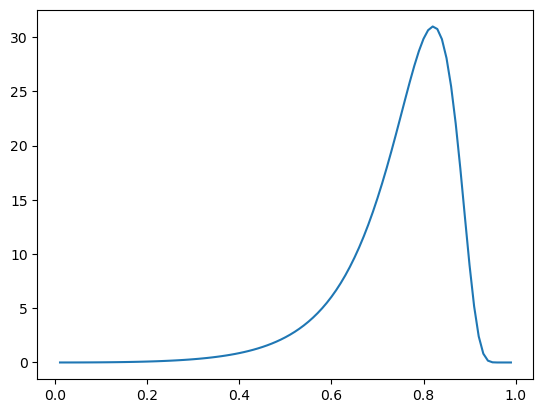

In [1]:
from math import pi
from numpy import arange, exp

from pylab import plot, show, title

def f_of_z(z):
    return z*z*z/(1-z)/(1-z)/(1-z)/(1-z)/(1-z)/(exp(z/(1-z))-1.0)

#number of steps
N0 = 100.0

#define left and right limits for the interval
ll = 0.0
rl = 1.0
h = (rl-ll)/N0

#make array of values to plot
x = arange(ll+h,rl,h)
y = f_of_z(x)

plot(x,y)
show()


We note the integrand goes smoothly to zero at 0 and 1; we will use this result below to avoid triggering division by zero errors.

Now we can start by calculating the integral using a Riemann sum.

In [2]:
# Riemann sum version

from math import pi
from numpy import arange, exp

#number of steps
N = 10.0

#define left and right limits and width of the sub-intervals
ll = 0.0
rl = 1.0
h = (rl-ll)/N

#find the midpoints of each sub-interval and evaluate f there
mx = arange(ll+(h/2),rl+(h/2),h)
my = f_of_z(mx)

#sum f at each midpoint times the width of each subinterval
dI = h*my
I = sum(dI)
print("N = ", N, "I = ", I)

#note this integral has a special value, pi^4/15:
true_val = pi*pi*pi*pi/15
print("ratio: ", I/true_val)
print("relative error: ", (I - true_val)/true_val)


N =  10.0 I =  6.631910744136816
ratio:  1.0212461702093842
relative error:  0.0212461702093842


In [3]:
#trapezoid version 

#number of steps
N2 = 5.0

#define left and right limits and width of the sub-intervals
ll = 0.0
rl = 1.0
h = (rl-ll)/N2

#find the endpoints of each sub-interval and evaluate f there
ex = arange(ll+h,rl,h)
fex = f_of_z(ex)
fa = 0
fb = 0

#sum f at each midpoint times the width of each subinterval
dI2 = h*fex
I2 = sum(dI2) + (h/2.0*fa) + (h/2.0*fb)
print("N = ", N2, "I = ", I2)

#note this integral has a special value, pi^4/15:
true_val = pi*pi*pi*pi/15
print("ratio: ", I2/true_val)
print("relative error: ", (I2 - true_val)/true_val)

N =  5.0 I =  7.372930116830782
ratio:  1.1353555461661877
relative error:  0.1353555461661878


Note in the last case, we had to set the values of the integrand by hand at the left and rightmost limits, to avoid division by zero errors, based on the previous figure.

In [4]:
#Simpson's version 

#number of steps
N3 = 3.0

#define left and right limits and width of the sub-intervals
ll = 0.0
rl = 1.0
h = (rl-ll)/N3

#find the endpoints of each sub-interval and evaluate f there
xodd = arange(ll+h,rl-h,2.0*h)
yodd = f_of_z(xodd)
xev = arange(ll+(2*h),rl-h,2.0*h)
yev = f_of_z(xev)
fa = 0
fb = 0

#sum f at each midpoint times the width of each subinterval
dIodd = 4.0/3.0*h*yodd
dIev = 2.0/3.0*h*yev
I3 = sum(dIodd) + sum(dIev) + (h/3.0*fa) + (h/3.0*fb)
print("N = ", N3, "I = ", I3)

#note this integral has a special value, pi^4/15:
true_val = pi*pi*pi*pi/15
print("ratio: ", I3/true_val)
print("relative error: ", (I3 - true_val)/true_val)


N =  3.0 I =  2.696969044311749
ratio:  0.41530554525506086
relative error:  -0.5846944547449391


8.1 Given these three methods, record the difference between the calculated integral and the exact value for each method for N (or N2 or N3) = 10, 30, 100, 300, 1000. (You can rerun things by hand, and cut and paste the printouts into a new text cell below, or you can write a loop and wrap it around the code. If you get overflows, just ignore them.)

In [5]:
from math import pi
from numpy import arange, exp

def riemann(N):
    ll = 0.0
    rl = 1.0
    h = (rl-ll)/N
    mx = arange(ll+(h/2),rl+(h/2),h)
    my = f_of_z(mx)
    dI = h*my
    I = sum(dI)
    true_val = pi*pi*pi*pi/15
    return [N,I,I/true_val,(I - true_val)/true_val]

#trapezoid version 
def trapezoid(N):
    ll = 0.0
    rl = 1.0
    h = (rl-ll)/N
    ex = arange(ll+h,rl,h)
    fex = f_of_z(ex)
    fa = 0
    fb = 0
    dI = h*fex
    I = sum(dI) + (h/2.0*fa) + (h/2.0*fb)
    true_val = pi*pi*pi*pi/15
    return [N,I,I/true_val,(I - true_val)/true_val]

#Simpson's version 
def simpson(N):
    ll = 0.0
    rl = 1.0
    h = (rl-ll)/N
    xodd = arange(ll+h,rl-h,2.0*h)
    yodd = f_of_z(xodd)
    xev = arange(ll+(2*h),rl-h,2.0*h)
    yev = f_of_z(xev)
    fa = 0
    fb = 0
    dIodd = 4.0/3.0*h*yodd
    dIev = 2.0/3.0*h*yev
    I = sum(dIodd) + sum(dIev) + (h/3.0*fa) + (h/3.0*fb)
    true_val = pi*pi*pi*pi/15
    return [N,I,I/true_val,(I - true_val)/true_val]

def printit(N):
    Rie = riemann(N)
    tra = trapezoid(N)
    sim = simpson(N)
    print('N =',N)
    s = "Riemann N={0}, I={1}\nRatio={2}, Relative error={3}"
    print(s.format(Rie[0],Rie[1],Rie[2],Rie[3]))
    s2 = "Trapezoid N={0}, I={1}\nRatio={2}, Relative error={3}"
    print(s2.format(tra[0],tra[1],tra[2],tra[3]))
    s3 = "Simpson's N={0}, I={1}\nRatio={2}, Relative error={3}"
    print(s3.format(sim[0],sim[1],sim[2],sim[3]))
    print(65*'*')

printit(10)
printit(30)
printit(100)
printit(300)
printit(1000)

N = 10
Riemann N=10, I=6.631910744136816
Ratio=1.0212461702093842, Relative error=0.0212461702093842
Trapezoid N=10, I=6.366257619997769
Ratio=0.9803383163346905, Relative error=-0.01966168366530947
Simpson's N=10, I=4.831008771656515
Ratio=0.7439257548307524, Relative error=-0.25607424516924754
*****************************************************************
N = 30
Riemann N=30, I=6.494126633710698
Ratio=1.0000288317202042, Relative error=2.8831720204291965e-05
Trapezoid N=30, I=6.493752884581415
Ratio=0.9999712781912705, Relative error=-2.8721808729520003e-05
Simpson's N=30, I=6.492891824502891
Ratio=0.9998386837789753, Relative error=-0.00016131622102467716
*****************************************************************
N = 100
Riemann N=100, I=6.493939401932252
Ratio=0.9999999999484788, Relative error=-5.1521257251927486e-11
Trapezoid N=100, I=6.493939402637864
Ratio=1.0000000000571356, Relative error=5.713568046566478e-11
Simpson's N=100, I=6.493940347695171
Ratio=1.00000014558

/var/folders/90/0h4jdcs15h31jqc56t9nnpfw0000gn/T/ipykernel_47776/1753787580.py:7: RuntimeWarning: overflow encountered in exp
  return z*z*z/(1-z)/(1-z)/(1-z)/(1-z)/(1-z)/(exp(z/(1-z))-1.0)


8.2 Plot the log of the (absolute value of the) error versus the log of N, for the three methods. How do they compare?

/var/folders/90/0h4jdcs15h31jqc56t9nnpfw0000gn/T/ipykernel_47776/1753787580.py:7: RuntimeWarning: overflow encountered in exp
  return z*z*z/(1-z)/(1-z)/(1-z)/(1-z)/(1-z)/(exp(z/(1-z))-1.0)


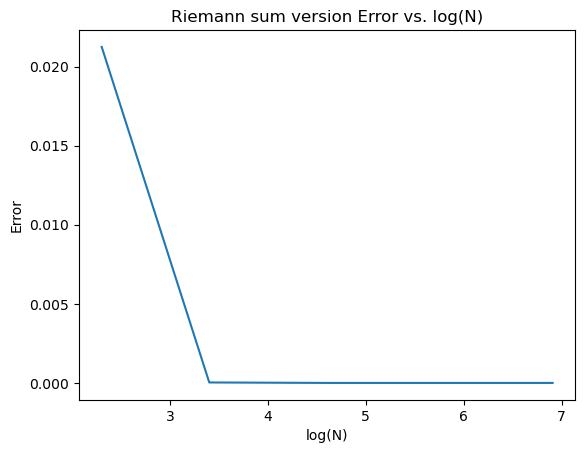

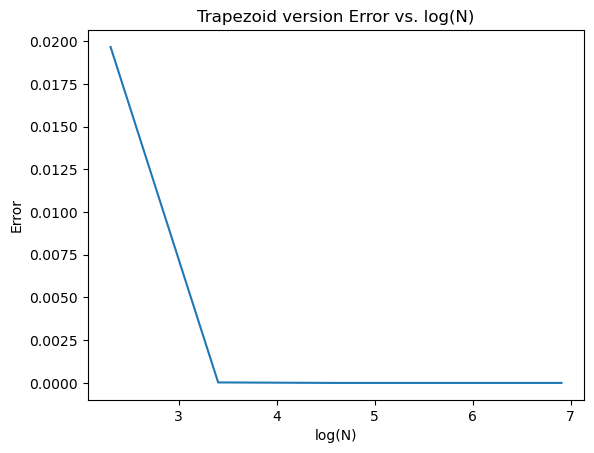

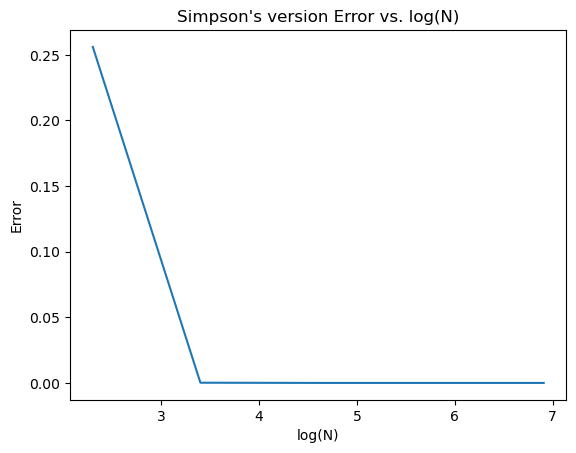

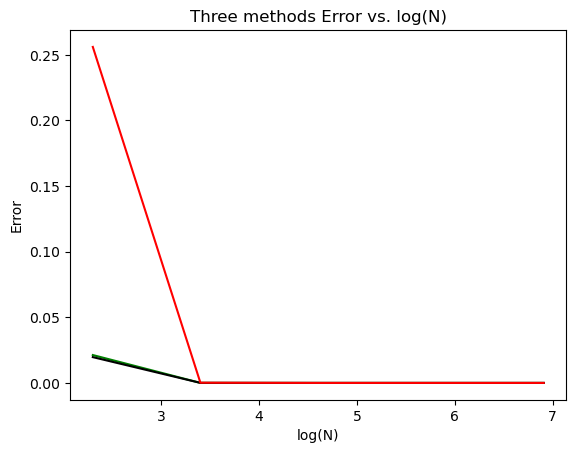

In [6]:
import math
import numpy
import pylab as plt
# Creat N values
n = [10,30,100,300,1000]
# Take log for each N value
log_n = numpy.log(n)
# Creates array for errors
Riemann_y = numpy.zeros(5,float)
Trapezoid_y = numpy.zeros(5,float)
Simpson_y = numpy.zeros(5,float)
# Set the value of errors for specific N value
for i in range(5):
    Riemann_y[i] = abs(riemann(n[i])[3])
    Trapezoid_y[i] = abs(trapezoid(n[i])[3])
    Simpson_y[i] = abs(simpson(n[i])[3])

# plot Riemann sum version
plt.plot(log_n,Riemann_y)
plt.title("Riemann sum version Error vs. log(N)")
plt.xlabel("log(N)")
plt.ylabel("Error")
plt.show()
# plot trapezoid version 
plt.plot(log_n,Trapezoid_y)
plt.title("Trapezoid version Error vs. log(N)")
plt.xlabel("log(N)")
plt.ylabel("Error")
plt.show()
# plot Simpson's version 
plt.plot(log_n,Simpson_y)
plt.title("Simpson's version Error vs. log(N)")
plt.xlabel("log(N)")
plt.ylabel("Error")
plt.show()
# plot all together
plt.plot(log_n,Riemann_y,c='green')
plt.plot(log_n,Trapezoid_y,c='black')
plt.plot(log_n,Simpson_y,c='red')
plt.title("Three methods Error vs. log(N)")
plt.xlabel("log(N)")
plt.ylabel("Error")
plt.show()

# The errors of all three of them are small, 
# and all three error methods decrease as N increases. 
# And they show linear correlation after N is taken log(N). 
# But Simpson's version will have a larger error 
# when N is small compared with the remaining two methods.